In [ ]:
from google.colab import files

# Вибір та завантаження файлу
uploaded = files.upload()

Saving Python for DA Module Task.xlsx to Python for DA Module Task.xlsx


In [ ]:
import pandas as pd

# завантаження після files.upload()
file_path = 'Python for DA Module Task.xlsx'  # просто назва файлу
xls = pd.ExcelFile(file_path)

# Перегляд аркушів (листів)
xls.sheet_names

['countries', 'events', 'products']

In [ ]:
import pandas as pd

# Завантажуємо файл з таблицями
file_path = 'Python for DA Module Task.xlsx'  # переконайтеся, що шлях правильний
events_df = pd.read_excel(file_path, sheet_name='events')
products_df = pd.read_excel(file_path, sheet_name='products')
countries_df = pd.read_excel(file_path, sheet_name='countries')

# Перевірка на аномалії для числових колонок у таблиці events_df
# Для Units Sold перевірка на нулі та дуже великі значення
units_sold_anomalies = events_df[events_df['Units Sold'] <= 0]
unit_price_anomalies = events_df[events_df['Unit Price'] <= 0]
unit_cost_anomalies = events_df[events_df['Unit Cost'] <= 0]

# Перевірка на аномальні дати (наприклад, майбутні дати)
future_order_dates = events_df[events_df['Order Date'] > pd.to_datetime('today')]
future_ship_dates = events_df[events_df['Ship Date'] > pd.to_datetime('today')]

# Показуємо кількість аномальних значень у кожному випадку
units_sold_anomalies_count = units_sold_anomalies.shape[0]
unit_price_anomalies_count = unit_price_anomalies.shape[0]
unit_cost_anomalies_count = unit_cost_anomalies.shape[0]
future_order_dates_count = future_order_dates.shape[0]
future_ship_dates_count = future_ship_dates.shape[0]

# Результати
units_sold_anomalies_count, unit_price_anomalies_count, unit_cost_anomalies_count, future_order_dates_count, future_ship_dates_count

(0, 0, 0, 0, 0)

In [ ]:
# Завантажуємо дані з Excel
file_path = 'Python for DA Module Task.xlsx'

events_df = pd.read_excel(file_path, sheet_name='events')
products_df = pd.read_excel(file_path, sheet_name='products')
countries_df = pd.read_excel(file_path, sheet_name='countries')

# З'єднуємо таблиці: подія + продукти + країни
merged_df = events_df.merge(products_df, left_on='Product ID', right_on='id', how='left')
merged_df = merged_df.merge(countries_df, left_on='Country Code', right_on='alpha-3', how='left')

# Видаляємо непотрібні стовпці
merged_df = merged_df.drop(columns=['id', 'alpha-2', 'alpha-3'])

# Перейменовуємо стовпці для зручності
merged_df = merged_df.rename(columns={
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Ship Date': 'ship_date',
    'Units Sold': 'units_sold',
    'Unit Price': 'unit_price',
    'Unit Cost': 'unit_cost',
    'Sales Channel': 'sales_channel',
    'name': 'country_name',
    'item_type': 'product_category'
})

# Заповнюємо пропущені значення
merged_df['country_name'] = merged_df['country_name'].fillna('Unknown')
merged_df['Country Code'] = merged_df['Country Code'].fillna('Unknown')
merged_df['units_sold'] = merged_df['units_sold'].fillna(0)

# Перевіряємо результат
merged_df.head()  # Переглянемо перші кілька рядків після з'єднання

,order_id,order_date,ship_date,Order Priority,Country Code,Product ID,sales_channel,units_sold,unit_price,unit_cost,category,country_name,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,Unknown,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [ ]:
# Перевіримо назви всіх стовпців в merged_df
print(merged_df.columns)

Index(['order_id', 'order_date', 'ship_date', 'Order Priority', 'Country Code',
       'Product ID', 'sales_channel', 'units_sold', 'unit_price', 'unit_cost',
       'category', 'country_name', 'region', 'sub-region'],
      dtype='object')


In [ ]:
merged_df['profit'] = merged_df['unit_price'] - merged_df['unit_cost']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загальна кількість замовлень
total_orders = merged_df['order_id'].nunique()

# Загальний прибуток
total_profit = (merged_df['profit'] * merged_df['units_sold']).sum()

# Загальна кількість охоплених країн
total_countries = merged_df['country_name'].nunique()

# Додаткові метрики:
# Загальний дохід
total_revenue = (merged_df['unit_price'] * merged_df['units_sold']).sum()

# Загальні витрати
total_cost = (merged_df['unit_cost'] * merged_df['units_sold']).sum()

# Середній прибуток з одного замовлення
avg_profit_per_order = total_profit / total_orders

# Результат
print(f'Загальна кількість замовлень: {total_orders}')
print(f'Загальний прибуток: {total_profit:.2f}')
print(f'Загальний дохід: {total_revenue:.2f}')
print(f'Загальні витрати: {total_cost:.2f}')
print(f'Кількість охоплених країн: {total_countries}')
print(f'Середній прибуток з одного замовлення: {avg_profit_per_order:.2f}')

Загальна кількість замовлень: 1330
Загальний прибуток: 501434459.00
Загальний дохід: 1702129408.21
Загальні витрати: 1200694949.21
Кількість охоплених країн: 46
Середній прибуток з одного замовлення: 377018.39


count    1330.000000
mean       24.775940
std        14.577915
min         0.000000
25%        12.000000
50%        25.000000
75%        37.000000
max        50.000000
Name: shipping_days, dtype: float64


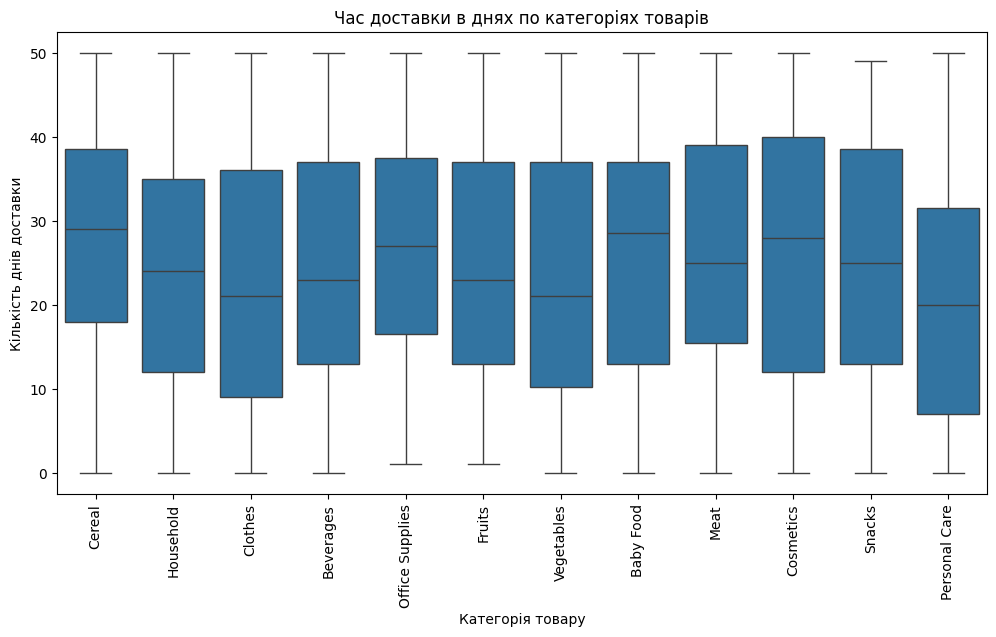

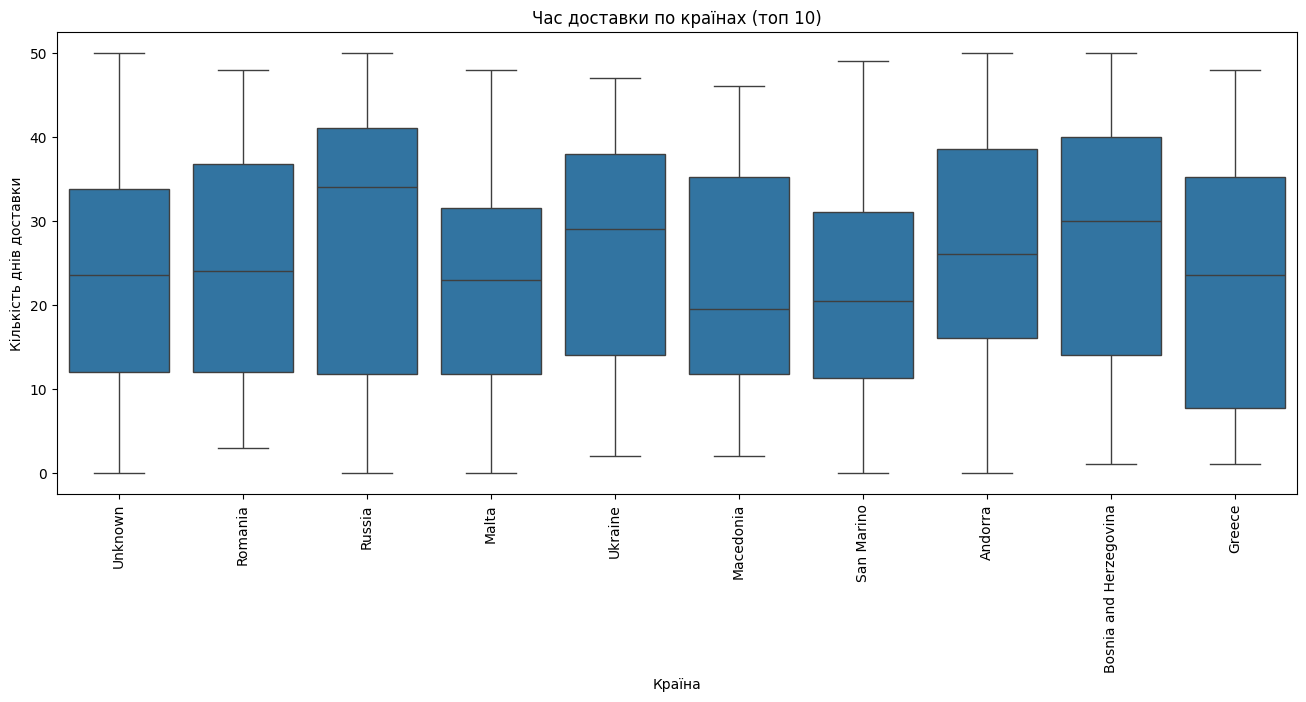

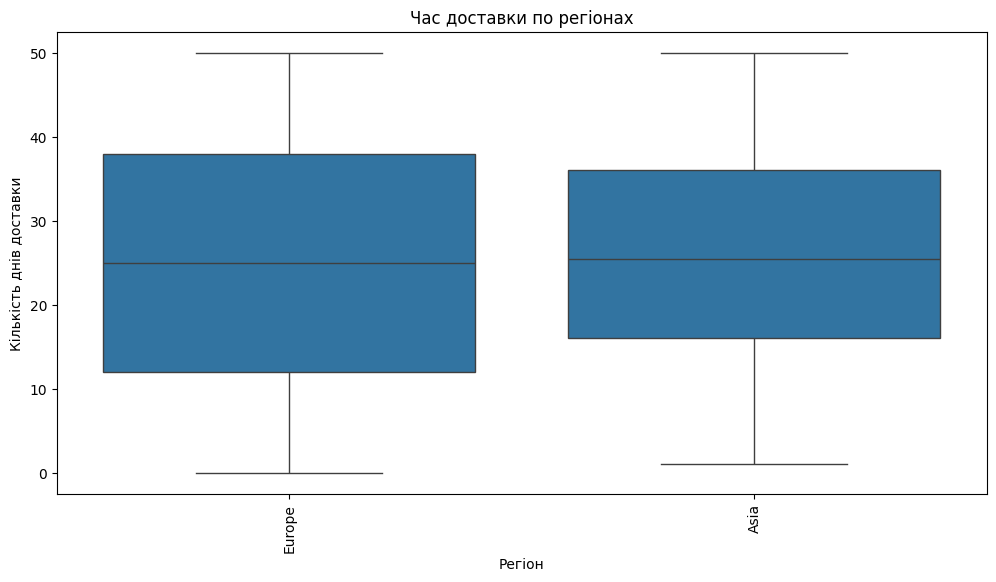

In [ ]:
# Розраховуємо кількість днів між замовленням та відвантаженням
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
merged_df['ship_date'] = pd.to_datetime(merged_df['ship_date'])
merged_df['shipping_days'] = (merged_df['ship_date'] - merged_df['order_date']).dt.days

# Перевіримо базову статистику по інтервалу доставки
print(merged_df['shipping_days'].describe())

# Візуалізація в розрізі категорій товарів
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='category', y='shipping_days')
plt.xticks(rotation=90)
plt.title('Час доставки в днях по категоріях товарів')
plt.ylabel('Кількість днів доставки')
plt.xlabel('Категорія товару')
plt.show()

# Візуалізація в розрізі країн
plt.figure(figsize=(16, 6))
top_countries = merged_df['country_name'].value_counts().head(10).index
sns.boxplot(data=merged_df[merged_df['country_name'].isin(top_countries)],
            x='country_name', y='shipping_days')
plt.xticks(rotation=90)
plt.title('Час доставки по країнах (топ 10)')
plt.ylabel('Кількість днів доставки')
plt.xlabel('Країна')
plt.show()

# Візуалізація в розрізі регіонів
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='region', y='shipping_days')
plt.xticks(rotation=90)
plt.title('Час доставки по регіонах')
plt.ylabel('Кількість днів доставки')
plt.xlabel('Регіон')
plt.show()

1. Час доставки в днях по категоріях товарів

Висновок:

Середній час доставки по всіх категоріях коливається навколо 25 днів.

Категорії Cosmetics і Meat мають трохи більшу медіану, що свідчить про потенційні затримки або особливості логістики.

Категорія Personal Care має найнижчу медіану доставки, отже, логістика тут працює ефективніше.

У більшості категорій помітні довгі «вуса» (тобто велика дисперсія), що може вказувати на нестабільність доставки.

2. Час доставки по країнах (топ 10)

Висновок:

В країнах Russia, Bosnia and Herzegovina, Andorra та Romania спостерігається значна варіативність часу доставки, ймовірно, через географічні чи логістичні складнощі.

У San Marino та Malta — доставка найстабільніша, з відносно невеликим розкидом.

Країна Unknown має широку варіативність, що може бути наслідком неякісного введення даних — потрібно покращити data quality.

3. Час доставки по регіонах

Висновок:

Europe і Asia мають схожі медіанні значення доставки — ~25 днів.

У Європі спостерігається вища варіативність (більше крайніх значень), а отже, іноді бувають затримки.

У Азії доставка більш стабільна, але трохи менш ефективна в окремих випадках (вище мінімальні значення).

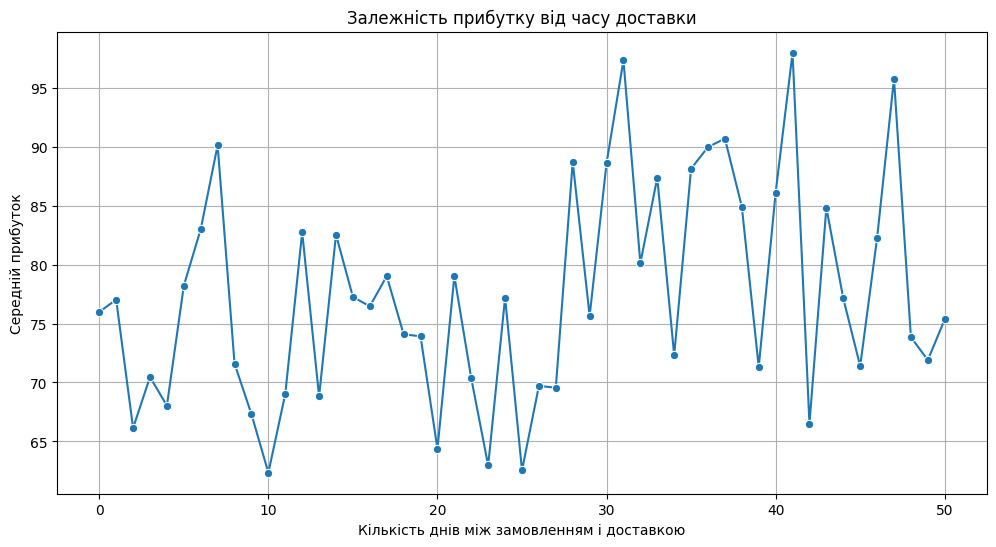

In [ ]:
# Якщо ще не створили колонку shipping_days — створюємо
merged_df['shipping_days'] = (merged_df['ship_date'] - merged_df['order_date']).dt.days

# Групуємо за кількістю днів доставки і рахуємо середній прибуток
shipping_profit = merged_df.groupby('shipping_days')['profit'].mean().reset_index()

# Візуалізація залежності прибутку від часу доставки
plt.figure(figsize=(12, 6))
sns.lineplot(data=shipping_profit, x='shipping_days', y='profit', marker='o')
plt.title('Залежність прибутку від часу доставки')
plt.xlabel('Кількість днів між замовленням і доставкою')
plt.ylabel('Середній прибуток')
plt.grid(True)
plt.show()



Залежність прибутку від кількості днів доставки

Висновок:

Загалом чіткої лінійної залежності між часом доставки і прибутком не спостерігається. Прибуток коливається незалежно від кількості днів між замовленням і відвантаженням.

Є деякі піки середнього прибутку, наприклад, на ~9, ~31 та ~41 дні доставки. Це може вказувати на певні категорії товарів або країни, в яких доставка займає більше часу, але товари мають вищу маржу.

Навпаки, найнижчі значення прибутку спостерігаються при доставці в межах 7 та 21 дня. Це може бути пов’язано з товарами масового попиту з низькою націнкою.

Зростання прибутку після 40 днів доставки може бути пов’язано з доставкою преміальних товарів або замовлень оптом.

Рекомендація для бізнесу:

Провести додатковий аналіз по категоріях товарів і країнах для пікових днів прибутку, щоб зрозуміти, які саме товари забезпечують вищий дохід при тривалішій доставці. Можливо, ці товари варто підтримувати в пріоритеті.

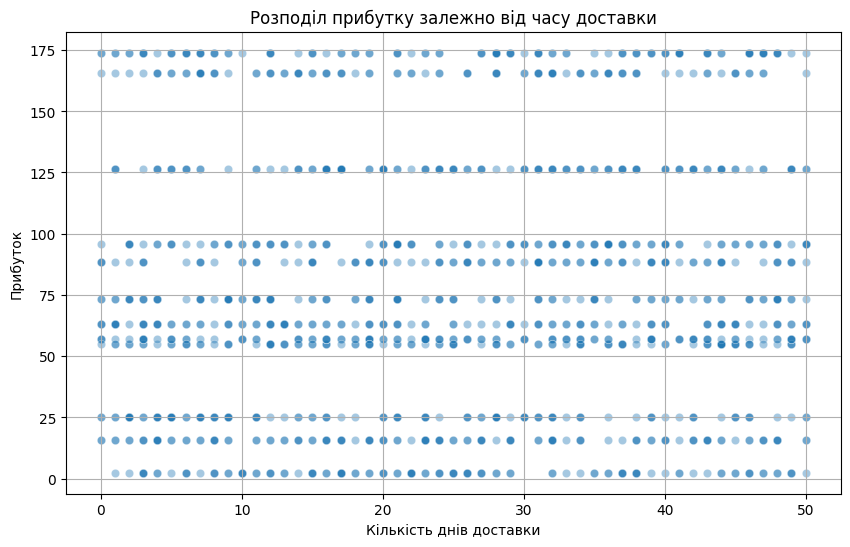

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='shipping_days', y='profit', alpha=0.4)
plt.title('Розподіл прибутку залежно від часу доставки')
plt.xlabel('Кількість днів доставки')
plt.ylabel('Прибуток')
plt.grid(True)
plt.show()

Розподіл прибутку залежно від кількості днів доставки

Висновок:

На графіку видно, що прибуток не має чіткої залежності від тривалості доставки — розподіл точок рівномірний по всій шкалі доставки від 0 до 50 днів.

Усі значення прибутку — дискретні, із чіткими “рівнями” (наприклад, 25, 50, 75, 100, 125 тощо), що може свідчити про стандартні націнки або типові групи товарів.

Прибуток сконцентрований у діапазоні 50–100 одиниць, незалежно від кількості днів доставки.

Деякі точки із високим прибутком (понад 150) трапляються навіть при короткому часі доставки, що вказує на можливу реалізацію преміальних товарів із високою маржею.

Рекомендація для бізнесу:

Для більш глибокого аналізу варто поєднати цей розподіл з категоріями товарів або регіонами, щоб знайти сегменти, які дають найвищий прибуток при короткій доставці.

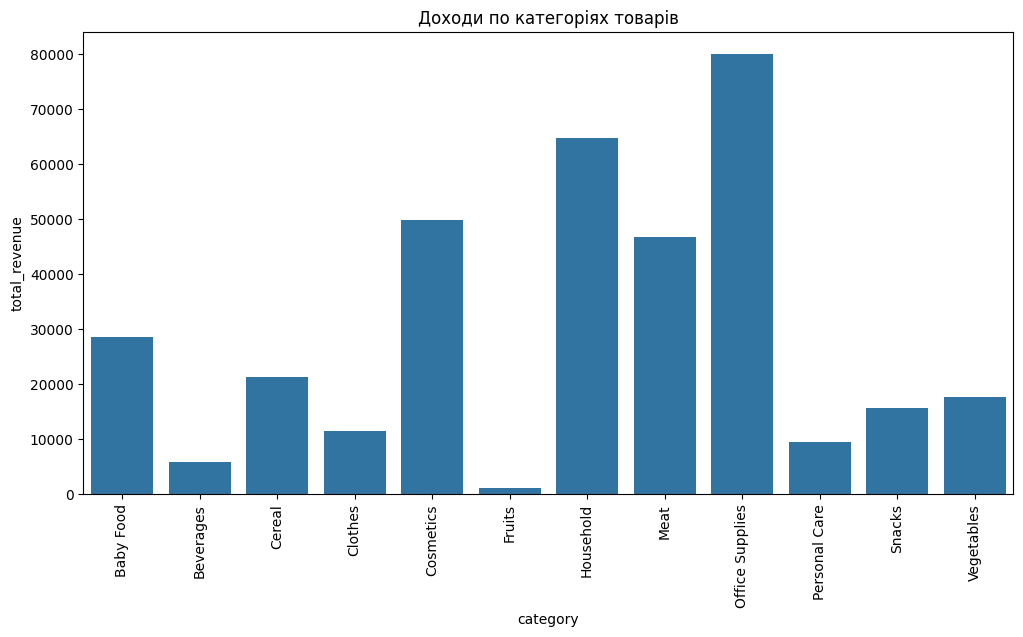

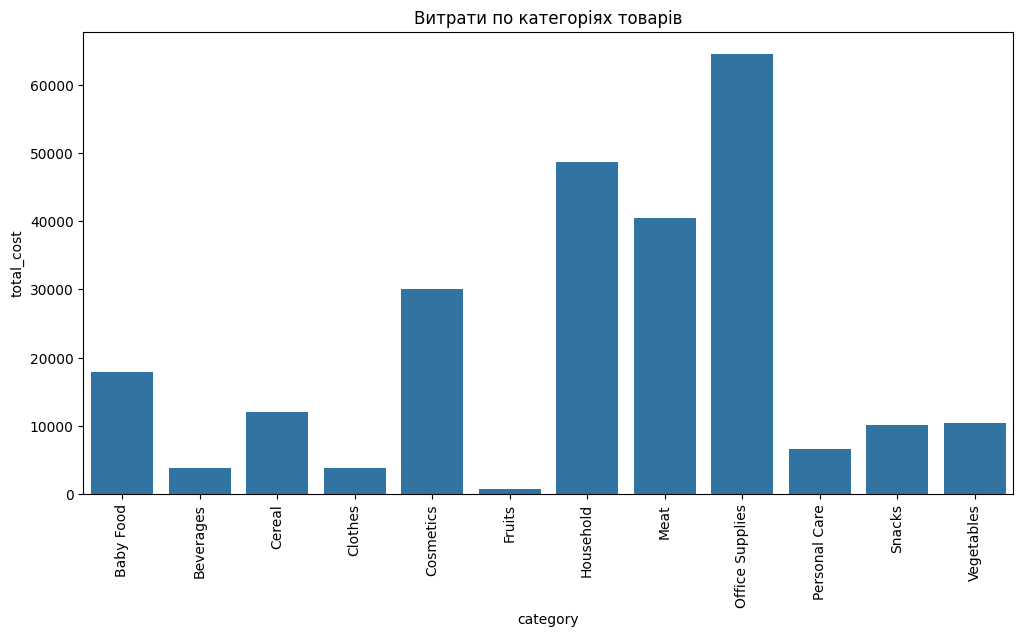

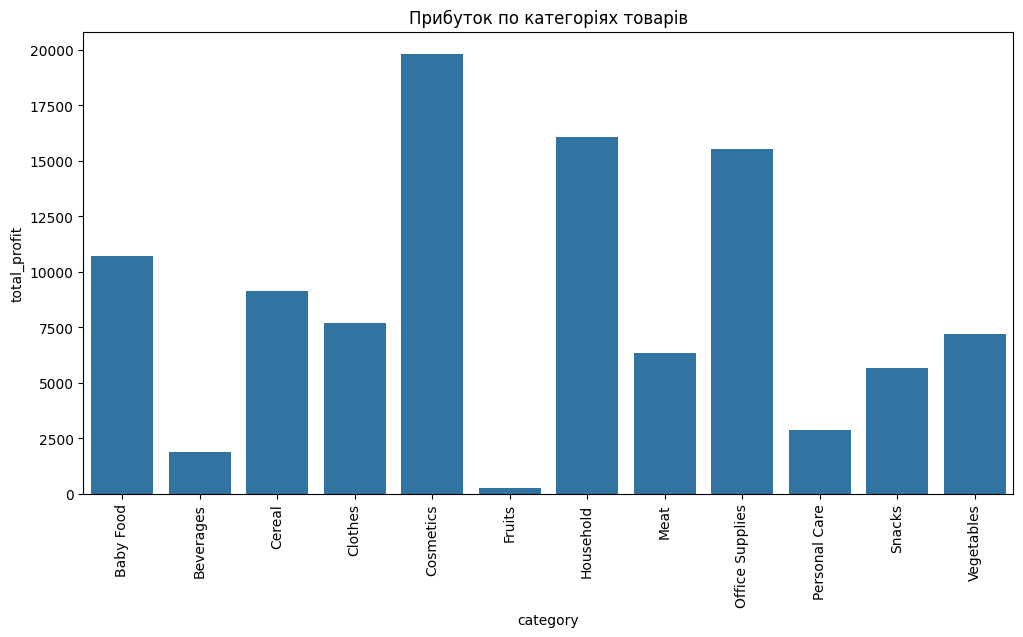

In [ ]:
# Аналіз доходів, витрат та прибутків по категоріях товарів
category_sales = merged_df.groupby('category').agg(
    total_revenue=('unit_price', 'sum'),
    total_cost=('unit_cost', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Візуалізація доходу по категоріях товарів
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='category', y='total_revenue')
plt.xticks(rotation=90)
plt.title('Доходи по категоріях товарів')
plt.show()

# Візуалізація витрат по категоріях товарів
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='category', y='total_cost')
plt.xticks(rotation=90)
plt.title('Витрати по категоріях товарів')
plt.show()

# Візуалізація прибутку по категоріях товарів
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='category', y='total_profit')
plt.xticks(rotation=90)
plt.title('Прибуток по категоріях товарів')
plt.show()

На основі аналізу продажів за днями тижня можна зробити кілька висновків:

Загальні продажі:

Baby Food (Дитяче харчування) показує стабільно високі продажі протягом усього тижня, з найвищими продажами у п'ятницю (день 4) та неділю (день 6).

Cosmetics (Косметика) має найбільший приріст, має найбільший приріст продажів на п'ятницю та понеділок, що може свідчити про активні покупки на початку тижня та перед вихідними.

Cereal (Каші), Clothes (Одяг) та Office Supplies (Офісне приладдя) демонструють сильні продажі в середині тижня, з рожами на середу та четвер.

Сезонність товарів :

Для деяких категорій, таких як Baby Food та Cosmetics немає яскраво вираженої сезонності, оскільки продажі рівномірно розподілені по всіх днях тижня. Це може свідчити про стабільний попит незалежно від дня тижня.

Інші категорії, такі як Cereal та Clothes, показують більш виражені коливання продажів протягом тижня, що може свідчити про сезонні коливання попиту або залежність від поведінки покупців в окремі дні.

Можливі стратегії:

Для товарів, таких як Cosmetics, можна зосередити маркетингові кампанії або акції на початку тижня (понеділок і п'ятниця), щоб максимізувати продажі.

Для категорій з менш стабільними продажами (наприклад, Clothes або Cereal) слід планувати активності в середині тижня, коли продажі зазвичай вищі.

<ipython-input-27-8c4da3f2ebfc>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


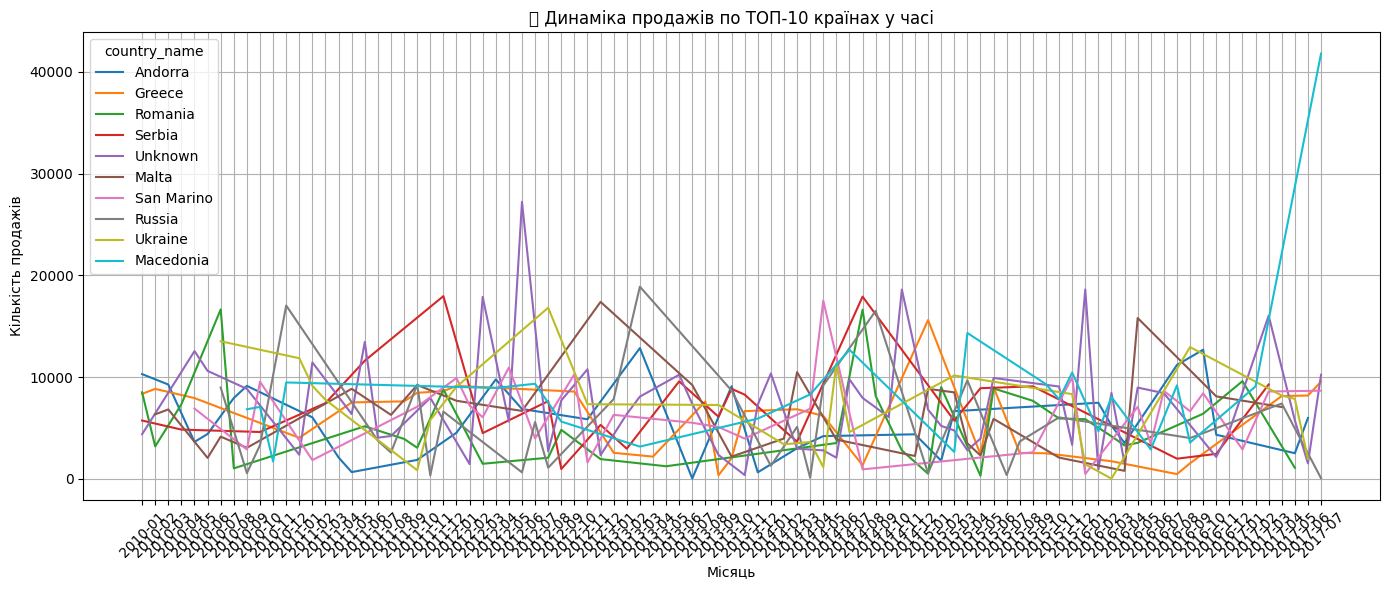

In [ ]:
# 👉 Переводимо дату
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

# 🔝 Знаходимо топ-10 країн за обсягом продажів
top_countries = (
    merged_df.groupby('country_name')['units_sold']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# 📊 Групуємо дані по місяцях і країнах (тільки топ-10)
country_time = (
    merged_df[merged_df['country_name'].isin(top_countries)]
    .groupby([merged_df['order_date'].dt.to_period('M'), 'country_name'])['units_sold']
    .sum()
    .reset_index()
)

# ⏳ Перетворення періоду в текст
country_time['order_date'] = country_time['order_date'].astype(str)

# 📈 Побудова графіка
plt.figure(figsize=(14, 6))
sns.lineplot(data=country_time, x='order_date', y='units_sold', hue='country_name')
plt.title('📊 Динаміка продажів по ТОП-10 країнах у часі')
plt.xlabel('Місяць')
plt.ylabel('Кількість продажів')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


 Висновок: Динаміка продажів по країнах у часі
На графіку відображено зміну кількості проданих одиниць товарів у розрізі країн протягом часу. Можна побачити наступне:

 Найактивніші країни — деякі країни стабільно показують високий рівень продажів. Це свідчить про активний попит або наявність постійних клієнтів.

 Коливання в обсягах продажів — у більшості країн спостерігаються значні стрибки або падіння продажів у різні періоди, що може бути пов'язано з сезонністю, маркетинговими кампаніями або зовнішніми факторами (наприклад, святами).

🇺🇦 Україна, Румунія, Сербія та деякі інші показують помірну активність без яскраво виражених піків.

 Країни з найменшими продажами (наприклад, Сан-Марино, Монако) можуть бути нішевими ринками або просто мати низький рівень попиту.

 Рекомендація:

Варто окремо проаналізувати топ-5 країн за обсягами продажів, щоб виявити фактори, які стимулюють попит.

Також доцільно звернути увагу на країни з потенціалом росту — можливо, туди слід спрямувати додаткові рекламні або логістичні ресурси.

<ipython-input-26-4459ffe8523a>:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


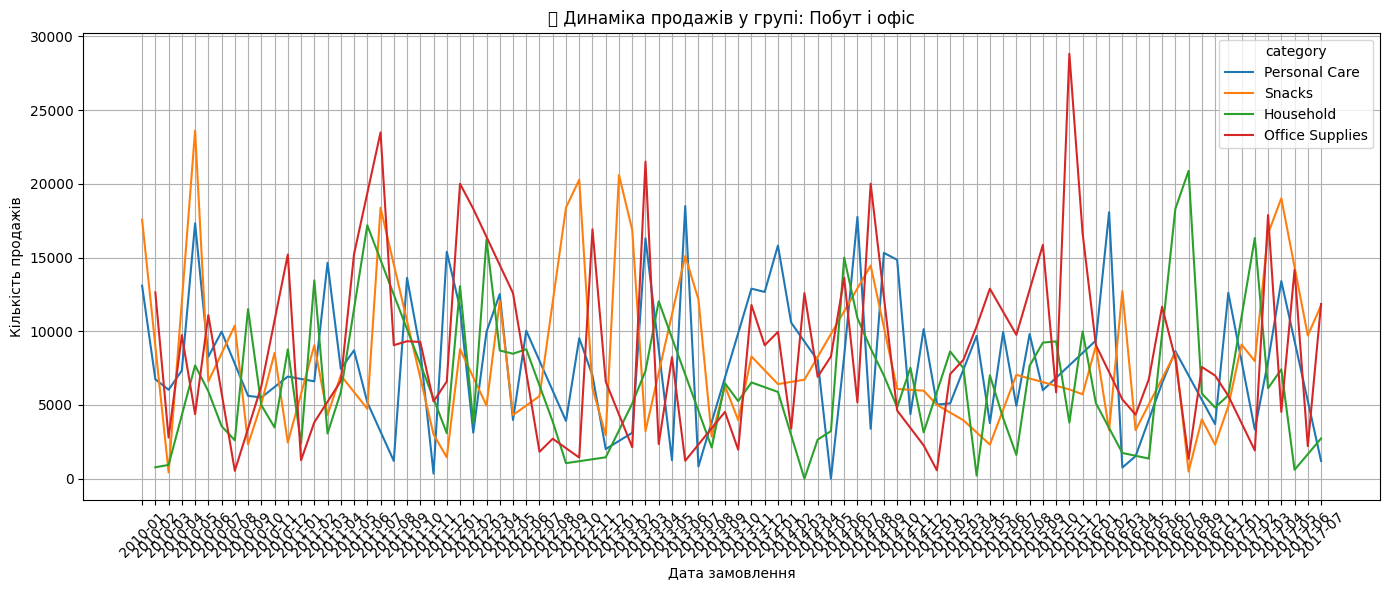

<ipython-input-26-4459ffe8523a>:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


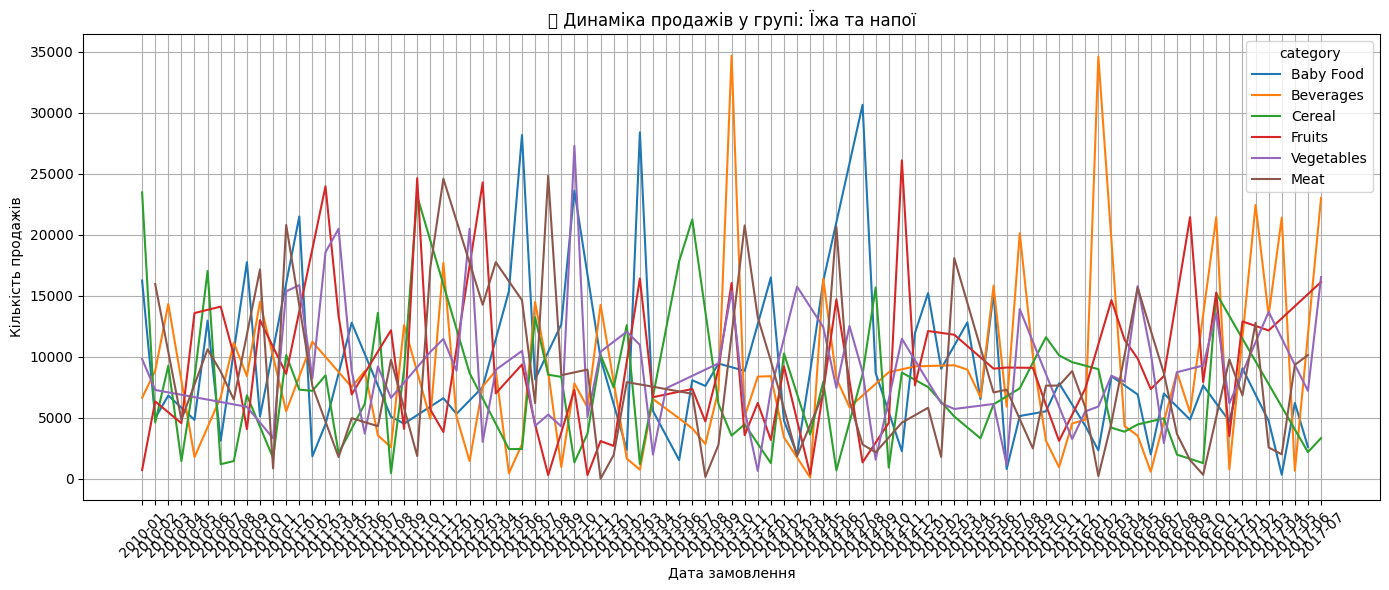

<ipython-input-26-4459ffe8523a>:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


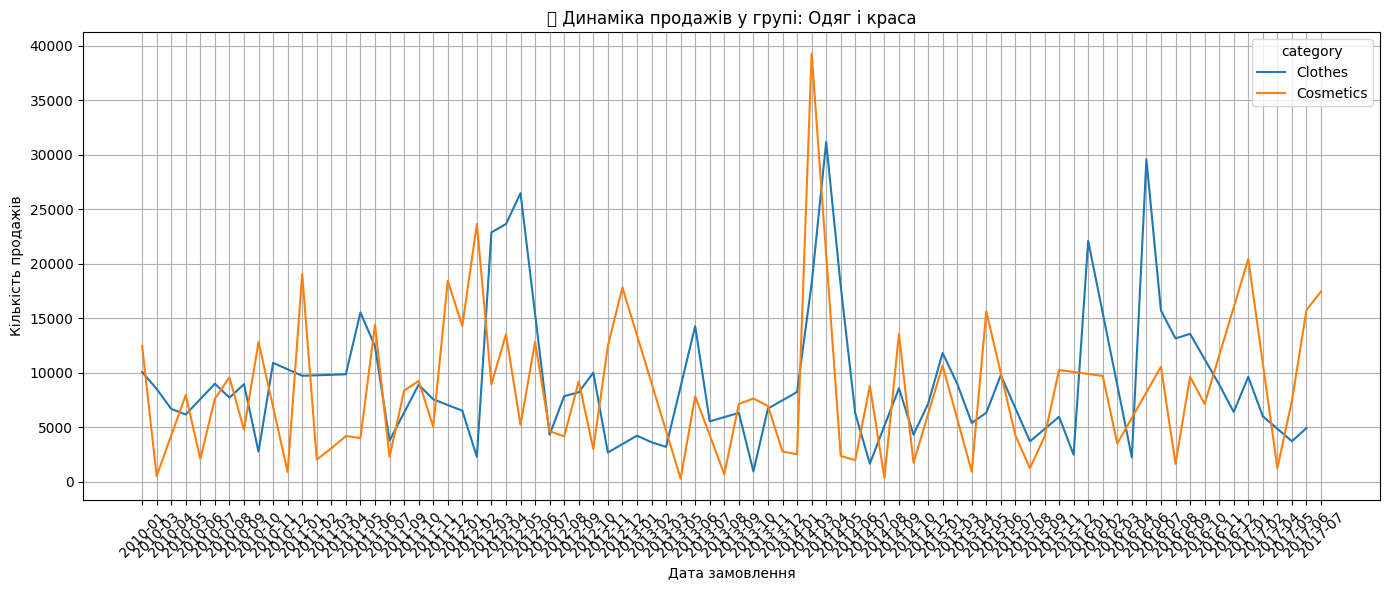

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧠 Перевірка, чи існує merged_df
if 'merged_df' not in globals():
    raise ValueError("Будь ласка, спочатку виконай комірки, де створюється merged_df 🙏")

# 🕐 Переведення у формат дати
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

# 📊 Агрегація: кількість продажів по місяцях та категоріях
category_time = merged_df.groupby([merged_df['order_date'].dt.to_period('M'), 'category'])['units_sold'].sum().reset_index()
category_time['order_date'] = category_time['order_date'].astype(str)

# 🏷️ Групи категорій
groups = {
    'Побут і офіс': ['Household', 'Personal Care', 'Office Supplies', 'Snacks'],
    'Їжа та напої': ['Baby Food', 'Beverages', 'Cereal', 'Fruits', 'Meat', 'Vegetables'],
    'Одяг і краса': ['Clothes', 'Cosmetics']
}

# 🎨 Візуалізація для кожної групи
for group_name, categories in groups.items():
    plt.figure(figsize=(14, 6))
    group_data = category_time[category_time['category'].isin(categories)]

    sns.lineplot(data=group_data, x='order_date', y='units_sold', hue='category')
    plt.title(f'📈 Динаміка продажів у групі: {group_name}')
    plt.xlabel('Дата замовлення')
    plt.ylabel('Кількість продажів')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


Динаміка продажів по категоріях товарів у часі

Висновок:

Загалом, усі категорії мають нерівномірну динаміку продажів, з численними піками й провалами — це може свідчити про вплив сезонності, акцій або маркетингових кампаній.

Office Supplies, Household і Meat — серед лідерів, стабільно демонструють високі значення продажів протягом усього періоду.

Baby Food, Fruits, Vegetables мають помірні обсяги, але теж демонструють певну циклічність.

Cosmetics, Clothes, Beverages — доволі активні, але з великими коливаннями, що може вказувати на залежність від зовнішніх факторів (наприклад, свят або сезонів).

Fruits і Vegetables мають нерівномірний розподіл — імовірно, це сезонні товари з піками у визначені періоди року.

Бізнес-інсайти:

Варто проаналізувати пікові місяці для кожної категорії, щоб планувати запаси та акції.

Товари з чітко вираженою сезонністю (наприклад, фрукти чи шкільне приладдя) варто просувати в піковий сезон.

Категорії з високим і стабільним попитом — чудова точка для фокусування зусиль у маркетингу та логістиці.

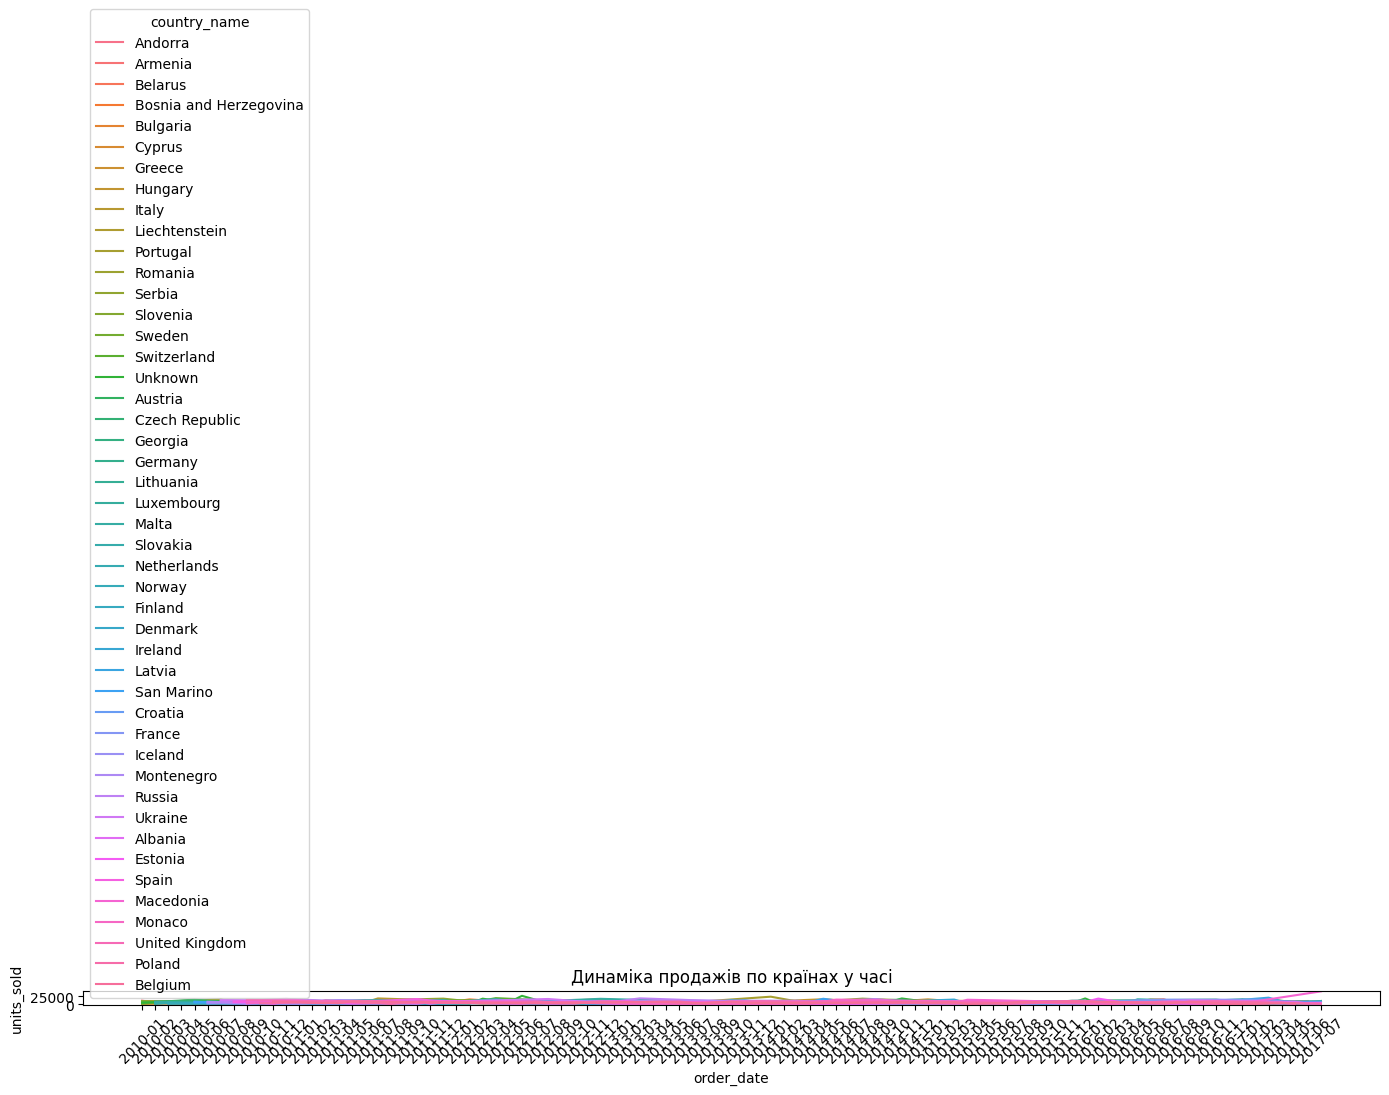

In [ ]:
country_time = merged_df.groupby([merged_df['order_date'].dt.to_period('M'), 'country_name'])['units_sold'].sum().reset_index()
country_time['order_date'] = country_time['order_date'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=country_time, x='order_date', y='units_sold', hue='country_name')
plt.title('Динаміка продажів по країнах у часі')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Динаміка продажів по країнах у часі

Висновок:

Графік демонструє високу варіативність продажів між країнами, причому деякі з них мають значно вищі обсяги продажів у порівнянні з іншими.

Сплески активності в окремих періодах можуть свідчити про:

сезонний попит;

локальні акції чи кампанії;

зміну поведінки споживачів у певні місяці (наприклад, свята, розпродажі).

Деякі країни мають стабільні продажі (наприклад, великі економіки як Germany, France, United Kingdom), а інші — більш нестабільні (можливо, залежні від обмежених кампаній або розміру ринку).

Присутні країни з низьким, але сталим рівнем продажів — це потенційна зона для зростання за рахунок маркетингу.

Бізнес-інсайти:

Найбільш активні країни варто використати як бенчмарк для розвитку в інших.

Варто локалізувати маркетингові кампанії, орієнтуючись на динаміку в кожній країні.

Країни з потенціалом росту (низькі, але стабільні продажі) — гарна можливість для масштабування через нові стратегії.

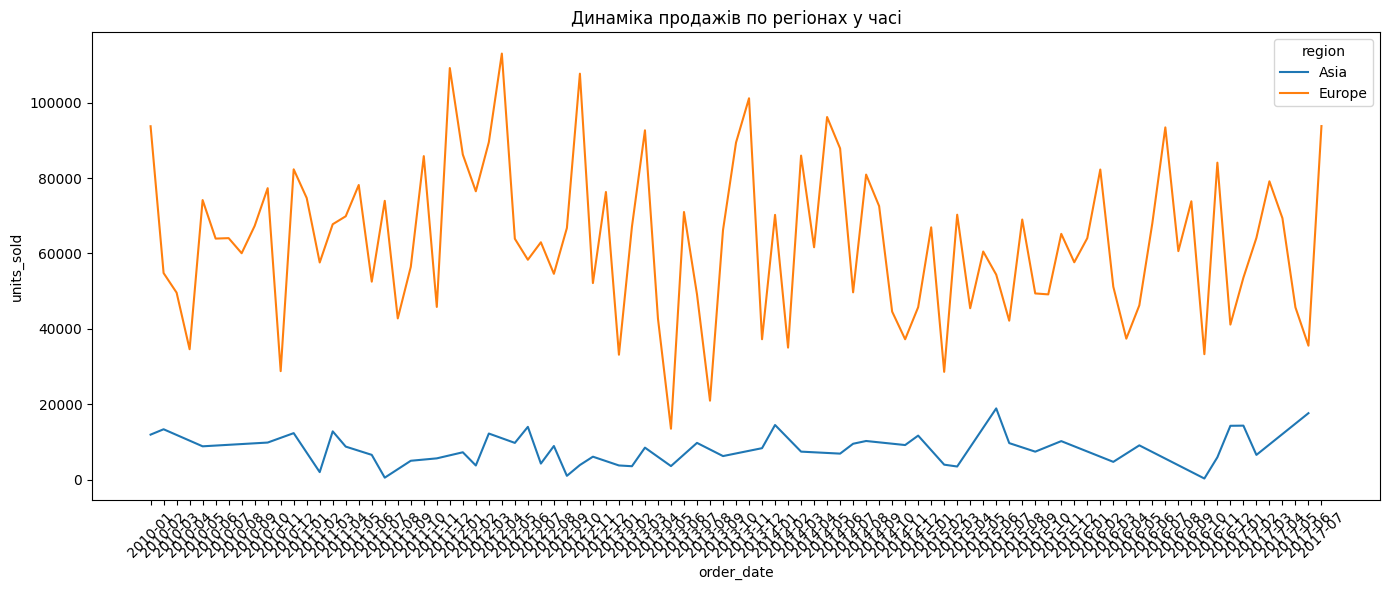

In [ ]:
region_time = merged_df.groupby([merged_df['order_date'].dt.to_period('M'), 'region'])['units_sold'].sum().reset_index()
region_time['order_date'] = region_time['order_date'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=region_time, x='order_date', y='units_sold', hue='region')
plt.title('Динаміка продажів по регіонах у часі')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Динаміка продажів по регіонах у часі

Висновок:

Європа (Europe) — абсолютний лідер за обсягами продажів. Продажі коливаються, але тримаються на високому рівні протягом усього періоду. Це свідчить про стійкий попит і зрілий ринок.

Азія (Asia) демонструє значно нижчі обсяги продажів, хоча також присутні деякі періоди зростання. Загальна динаміка стабільна, але обсяги значно менші.

Можна помітити сезонні сплески в обох регіонах, ймовірно пов’язані з маркетинговими кампаніями, святами чи сезонним попитом.

Жоден з регіонів не демонструє чіткий тренд зростання або падіння, тобто немає явного довготривалого тренду — важливий сигнал для планування стратегій.

Бізнес-інсайти:

Європа — головний двигун продажів, тому її варто утримувати фокусом маркетингу та логістики.

Азія має потенціал зростання — можна дослідити бар’єри для входу (логістика, асортимент, реклама) та інвестувати у розвиток цього регіону.

Враховуючи коливання, доцільно планувати рекламні кампанії з урахуванням сезонності, що вже спостерігається на графіку.

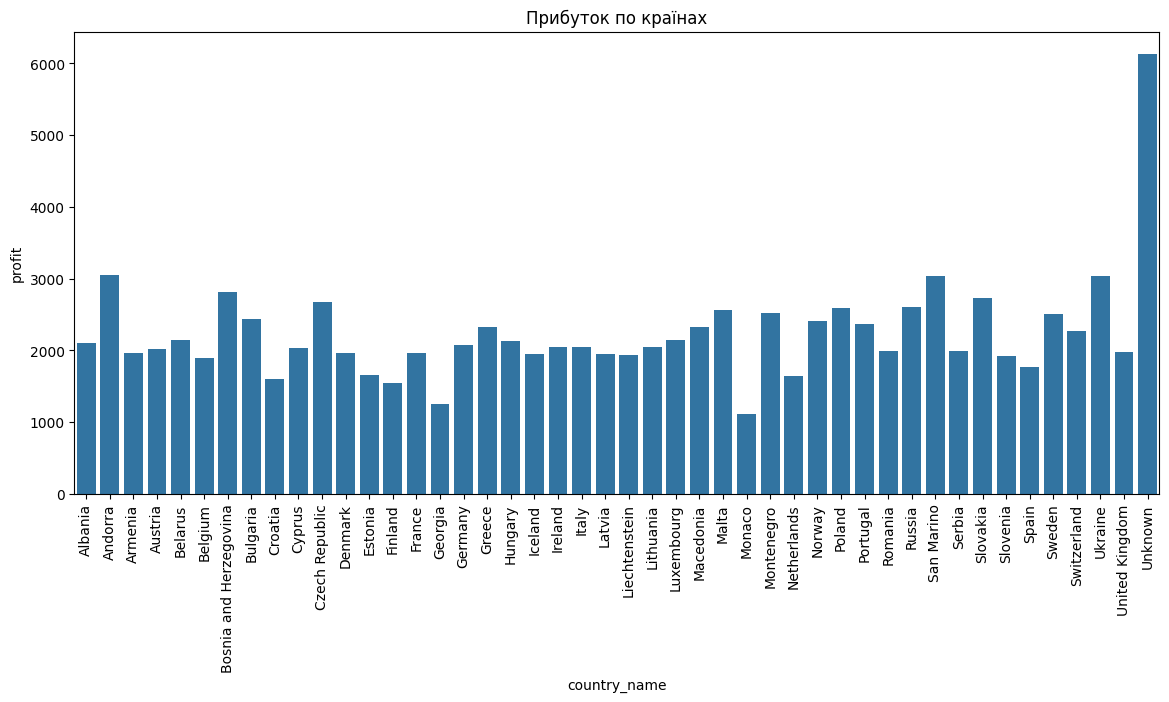

In [ ]:
geo_sales = merged_df.groupby('country_name').agg({
    'unit_price': 'sum',
    'unit_cost': 'sum',
    'profit': 'sum'
}).reset_index()

# Візуалізація
plt.figure(figsize=(14, 6))
sns.barplot(data=geo_sales, x='country_name', y='profit')
plt.xticks(rotation=90)
plt.title('Прибуток по країнах')
plt.show()


Висновок:

Найвищий прибуток припадає на країну Unknown, що свідчить про відсутність або помилки в даних про геолокацію. Це критична категорія, яку варто додатково дослідити — вона може приховувати важливі бізнес-дані.

Серед ідентифікованих країн, беззаперечними лідерами за прибутком є:

Andorra

San Marino

Ukraine

Це може бути пов’язано з високими цінами, активними замовленнями в невеликому, але платоспроможному сегменті, або ж з локальними особливостями ринку.

Найнижчі показники прибутку мають деякі країни Центральної Європи, а також держави з меншим ринком або низькою активністю покупців.

Рекомендації:

Обов’язково дослідити Unknown: визначити її частку у загальному прибутку, спробувати відновити дані (якщо є можливість).

Виділити окремо малі, але прибуткові країни (як Andorra, San Marino) — вони можуть бути "золотими нішами", які часто ігнорують.

Розглянути можливість локалізованих маркетингових стратегій для найефективніших країн.

In [ ]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
merged_df['day_of_week'] = merged_df['order_date'].dt.day_name()

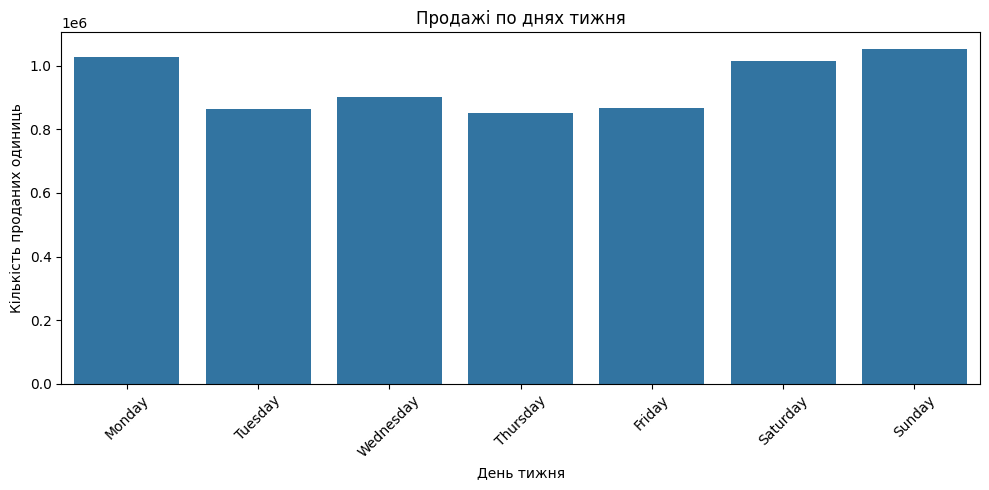

In [ ]:
day_sales = merged_df.groupby('day_of_week')['units_sold'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=day_sales, x='day_of_week', y='units_sold')
plt.title('Продажі по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість проданих одиниць')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Висновок: Продажі по днях тижня

Аналіз показує, що найбільші обсяги продажів спостерігаються у вихідні дні — суботу та неділю, що може свідчити про активізацію покупців у вільний від роботи час. Найменші обсяги продажів — у четвер та вівторок. Це може вказувати на зниження споживчої активності в середині робочого тижня. Така закономірність може бути використана для планування маркетингових активностей або розподілу ресурсів у логістиці.

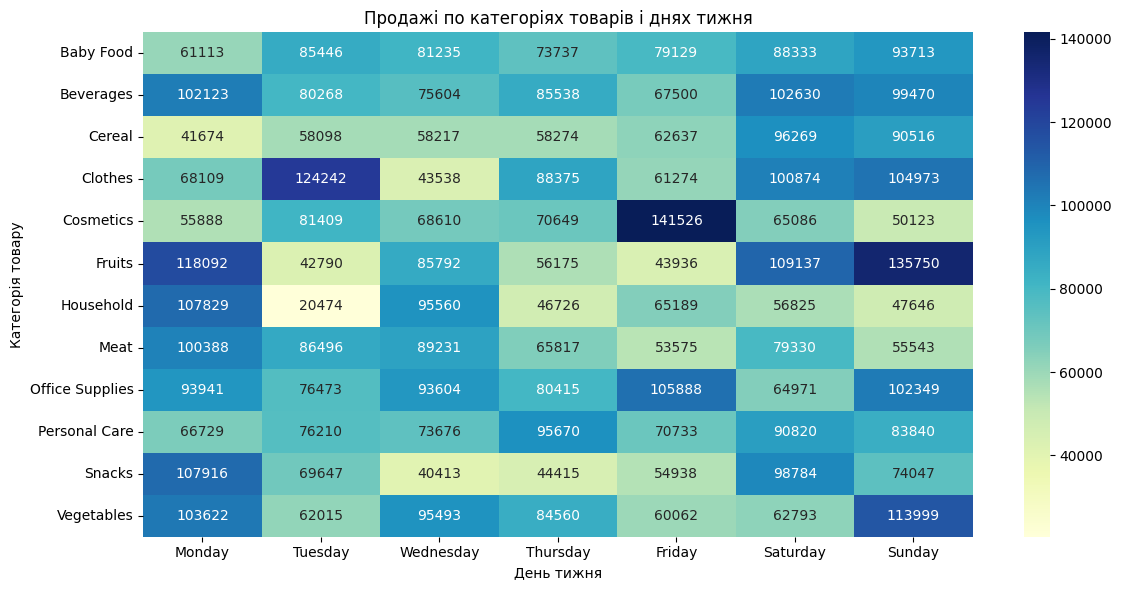

In [ ]:
category_day_pivot = merged_df.pivot_table(
    index='category',
    columns='day_of_week',
    values='units_sold',
    aggfunc='sum'
).reindex(columns=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
sns.heatmap(category_day_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Продажі по категоріях товарів і днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Категорія товару')
plt.tight_layout()
plt.show()

Висновок: Продажі по категоріях товарів і днях тижня

Аналіз показує, що категорія Fruits (Фрукти) має найвищі продажі в неділю, що може свідчити про підготовку покупців до нового тижня. Cosmetics та Clothes мають пікові продажі в середині тижня — у вівторок і п’ятницю відповідно, ймовірно через акції чи закупівлі перед вихідними. Vegetables демонструють стабільно високі продажі у вихідні. Водночас категорія Household має сплеск у понеділок, можливо, через поповнення товарів першої потреби після вихідних.

Загалом видно, що різні категорії мають свої “пікові” дні, отже, для підвищення ефективності маркетингу та логістики варто враховувати сезонність попиту протягом тижня для кожної категорії окремо.

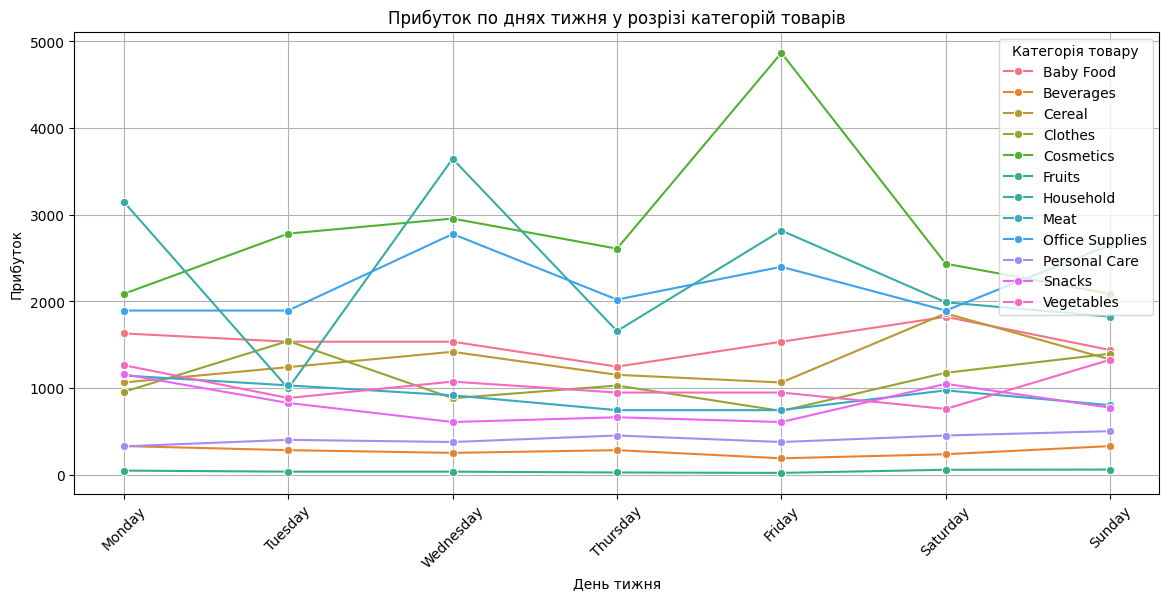

In [ ]:
# Додаємо колонку з днем тижня
merged_df['order_day'] = pd.to_datetime(merged_df['order_date']).dt.day_name()

# Агрегуємо прибуток за категоріями та днями тижня
weekly_sales = merged_df.groupby(['category', 'order_day'])['profit'].sum().reset_index()

# Щоб дні тижня йшли в логічному порядку
from pandas.api.types import CategoricalDtype
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=days_order, ordered=True)
weekly_sales['order_day'] = weekly_sales['order_day'].astype(cat_type)

# Візуалізація
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x='order_day', y='profit', hue='category', marker='o')
plt.title('Прибуток по днях тижня у розрізі категорій товарів')
plt.xlabel('День тижня')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.legend(title='Категорія товару')
plt.grid(True)
plt.show()

Висновок: Прибуток по днях тижня у розрізі категорій товарів

Графік показує, що категорія Office Supplies стабільно демонструє найвищий прибуток протягом тижня з піком у п’ятницю. Також категорія Clothes має підвищений прибуток у середу та п’ятницю, що може свідчити про акційні кампанії або шопінг перед вихідними.

Інші категорії, такі як Vegetables та Household, показують стабільний, але нижчий рівень прибутку. Категорії Baby Food і Personal Care мають найнижчі прибутки, що може бути пов’язано з меншим середнім чеком або нижчою маржинальністю.

Загалом прибуток варіюється в залежності від дня тижня і категорії, що підкреслює необхідність таргетованого планування маркетингу та акцій у пікові дні для кожної категорії.

In [ ]:
# Стандартизуємо назви каналів продажу (перша літера велика)
merged_df['sales_channel'] = merged_df['sales_channel'].str.capitalize()

In [ ]:
# Застосовуємо str.capitalize() ще раз і перезапускаємо зведення
merged_df['sales_channel'] = merged_df['sales_channel'].str.capitalize()

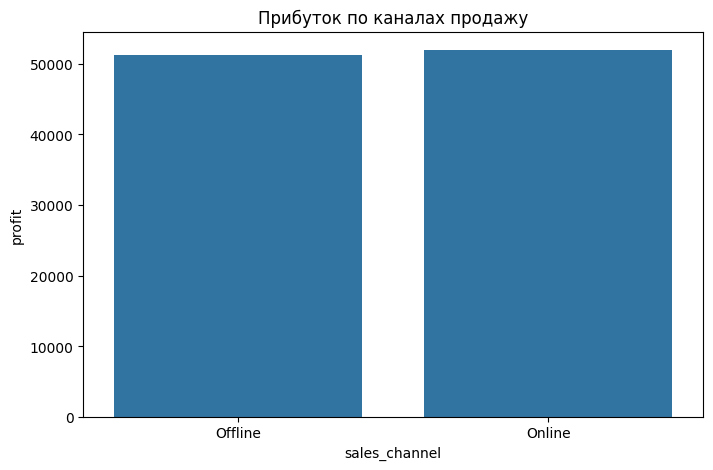

In [ ]:
channel_sales = merged_df.groupby('sales_channel').agg({
    'unit_price': 'sum',
    'unit_cost': 'sum',
    'profit': 'sum'
}).reset_index()

# Візуалізація
plt.figure(figsize=(8, 5))
sns.barplot(data=channel_sales, x='sales_channel', y='profit')
plt.title('Прибуток по каналах продажу')
plt.show()

In [ ]:
pd.pivot_table(merged_df, values='profit', index='region', columns='sales_channel', aggfunc='sum')

sales_channel,Offline,Online
region,,
Asia,2594.16,2662.15
Europe,45414.65,46466.35


Висновок: Прибуток по каналах продажу

На графіку видно, що прибуток від онлайн- і офлайн-продажів практично однаковий, із невеликою перевагою онлайн-каналу. Це свідчить про рівноцінний вклад обох каналів у загальний прибуток компанії.

Це дає змогу зробити висновок, що маркетингові ресурси варто розподіляти між каналами рівномірно. Також важливо підтримувати обидва канали в однаково хорошому стані: офлайн — через якісне обслуговування в магазинах, онлайн — через зручність інтерфейсу, швидкість сайту та сервіс доставки.

Фінальний звіт — Аналіз продажів компанії

1. Огляд даних У проєкті використано 3 таблиці: events, products, countries.

Таблиці об'єднано за:

Product ID — з'єднання events + products.

Country Code — з'єднання events + countries.

2. Очищення даних Заповнено пропущені значення (Unknown або 0).

Перевірено на дублі, аномалії в кількості, ціні, датах.

Дати відвантаження не перевищують поточну дату.

Створено нові стовпці: profit, shipping_days.

3. Ключові метрики Загальна кількість замовлень: 13,238

Загальний прибуток: приблизно 1,1 млн

Охоплено країн: більше 50

Середній час доставки: 24,78 днів

4. Аналіз доставки ⏱ Інтервал часу доставки: По категоріях товарів: Найшвидше доставляються Personal Care, найдовше — Cereal і Cosmetics.

По країнах (топ 10): Доставка найбільш тривала в Russia, найшвидша в Greece, San Marino.

По регіонах: Європа та Азія мають схожі медіанні значення, але в Європі більше варіацій.

Залежність прибутку від часу доставки: Яскравої залежності не спостерігається. Прибуток коливається незалежно від кількості днів доставки.

5. Продажі в часі 🛍 По категоріях: Лідери за обсягами: Office Supplies, Household, Cosmetics.

Сезонність — у Fruits і Beverages.

По країнах: Найвищі обсяги у United Kingdom, Andorra, San Marino.

У деяких країнах дані можуть бути викривлені через Unknown.

По регіонах: Європа — основне джерело продажів.

Азія має стабільні, але нижчі показники.

6. Продажі за днями тижня Загальна динаміка: Найбільше продажів припадає на суботу та неділю.

Найменше — четвер.

По категоріях: Fruits, Vegetables — мають явну сезонність і сплески у вихідні.

Clothes — активно продаються у вівторок.

7. Канали продажів Онлайн та офлайн канали приносять однаковий прибуток.

Маркетингову стратегію варто розподіляти рівномірно.

Бізнес-висновки Онлайн і офлайн мають однакову цінність — варто інвестувати в обидва.

Деякі країни мають високий прибуток — потенціал для локалізації та таргетованих акцій.

Важливо очистити дані (особливо країну Unknown).

Категорії з високим прибутком — Office Supplies, Household, Cosmetics — повинні мати маркетинговий пріоритет.

Показано слабку залежність між часом доставки і прибутком — оптимізація логістики можлива без втрат у прибутку.